In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


/var/folders/06/4lfc08752zv_l79gm6nmv18w0000gn/T/ipykernel_10802/1672235246.py:6: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  noisy_image = misc.ascent() + np.random.normal(0, 20, size=misc.ascent().shape)


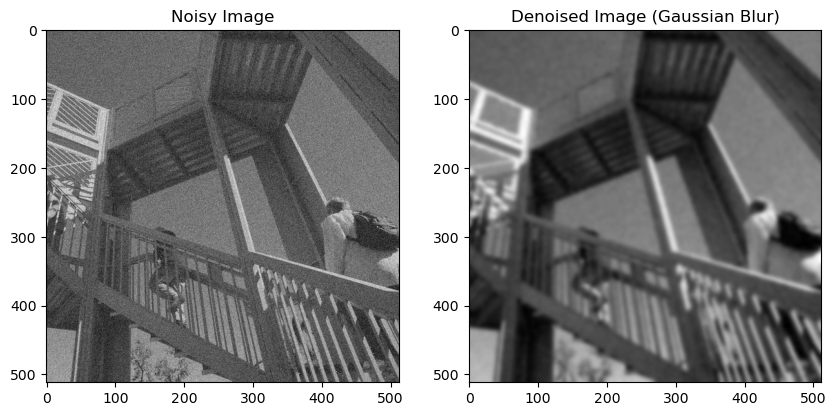

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage

# Load a noisy image
noisy_image = misc.ascent() + np.random.normal(0, 20, size=misc.ascent().shape)

# Apply Gaussian blur for denoising
denoised_image = ndimage.gaussian_filter(noisy_image, sigma=3)

# Display original and denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Gaussian Blur)')
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Load a noisy audio file
sample_rate, noisy_audio = wavfile.read('noisy_audio.wav')

# Compute the spectrogram of the noisy audio
freqs, times, spectrogram_data = spectrogram(noisy_audio, fs=sample_rate)

# Perform spectral subtraction for denoising
noise_floor = np.mean(spectrogram_data[:, :50], axis=1)
denoised_spectrogram = np.maximum(spectrogram_data - noise_floor[:, np.newaxis], 0)

# Reconstruct the denoised audio
denoised_audio = np.fft.irfft(denoised_spectrogram, axis=1)

# Display original and denoised audio waveforms
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(noisy_audio)
plt.title('Noisy Audio')

plt.subplot(2, 1, 2)
plt.plot(denoised_audio)
plt.title('Denoised Audio (Spectral Subtraction)')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'noisy_audio.wav'